In [5]:
import requests
import io
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

In [6]:
bft_source = "local" # choose `net` to download it

cols = [
    'sso_number', 'sso_name', 'sso_class',
    'spins.1.period.value', 'spins.2.period.value',
]

if bft_source == "local":
    # Local Configuration
    bft_file = '/tmp/ssoBFT-latest.parquet' 
    bft = pd.read_parquet(bft_file, columns=cols)
elif bft_source == 'net':
    r = requests.get("https://ssp.imcce.fr/data/ssoBFT-latest_Asteroid.parquet")
    bft = pd.read_parquet(io.BytesIO(r.content), columns=cols)
    bft.to_parquet("/tmp/ssoBFT-latest.parquet")

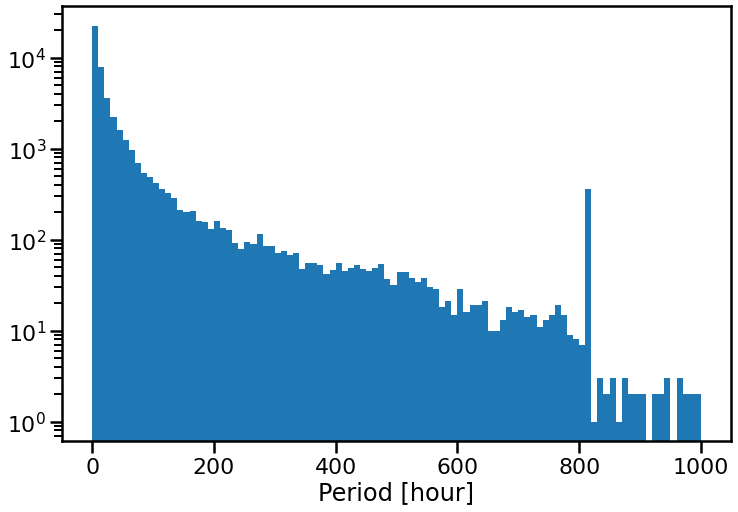

In [9]:
fig = plt.figure(figsize=(12, 8))

periods_bft = bft[bft["spins.1.period.value"] == bft["spins.1.period.value"]]["spins.1.period.value"]

plt.hist(periods_bft, bins=100, range=(0, 1000))
plt.yscale("log")
plt.xlabel("Period [hour]");